In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
sp = spacy.load('en_core_web_sm')

In [53]:
fsize = 12
lsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
style = 'default'

plt.style.use(style)
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = lsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [3]:
import pickle

pickle_obj = "HudsonSimileClauses"
dbfile = open(pickle_obj, 'rb')
simile_list = pickle.load(dbfile)

In [8]:
def get_POS(text_list):
    POS_arr = []
    for line in text_list:
        sent_pos_arr = []
        sent_tag_arr = []
        sp_out = sp(line)
        tokenized = []
        for token in sp_out:
            tokenized.append(token)
            sent_pos_arr.append(token.pos_)
            sent_tag_arr.append(token.tag_)
        text_pos_dict = {"text": tokenized, "pos": sent_pos_arr, "tag": sent_tag_arr}
        POS_arr.append(text_pos_dict)
    return POS_arr

In [9]:
simile_w_pos = get_POS(simile_list)

In [10]:
print(simile_w_pos[0])

{'text': [ , a, shark, that, 's, been, in, a, fish, tank, for, a, week, .], 'pos': ['SPACE', 'DET', 'NOUN', 'PRON', 'AUX', 'AUX', 'ADP', 'DET', 'NOUN', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'], 'tag': ['_SP', 'DT', 'NN', 'WDT', 'VBZ', 'VBN', 'IN', 'DT', 'NN', 'NN', 'IN', 'DT', 'NN', '.']}


In [14]:
simile_nouns = []
for entry in simile_w_pos:
    entry_nouns = []
    for idx in range(len(entry['pos'])):
        if entry['pos'][idx] == 'NOUN':
            entry_nouns.append(entry['text'][idx])
    simile_nouns.append(entry_nouns)

In [15]:
print(simile_nouns)

[[shark, fish, tank, week], [jack, rabbit, date, whites, barcelona], [spandex, beach], [degrees, rain, wind], [ghost, fog], [bloodhound, center, goal, softness, candlelight], [shark, dentist], [knife, thrower, circus], [skirt, boot], [shark, dentist], [teenager, cell, phone, goalkeeper, back], [turtle], [shower, arrows, back], [skirt, boot], [alligator, itch, one], [penalty], [teams, home, field, advantage], [plumbing, product, list], [brother], [halt, ball], [man, basketball, sweaty, armpits, baseball], [maniac, possess, man, fish, veins, neck, strangers, hair, tears, size, pineapple, chunks, feeling, jubilation, ribcage, moment, rapture], [magnet], [train, hospital, tricks, nursing, home], [Cave], [lumps, coal], [surfer, mushroom, belief, way], [spider, monkey], [], [team, planet], [man], [belly, heavenly-, sitters], [bear, trap], [cat], [boy, seashore, pebbles, shells, portion, truth], [], [diamond], [turkey, season], [feeling, spirit, hurt], [necklace, sledgehammers], [lion, cub, m

In [21]:
flat_nouns = [str(x) for y in simile_nouns for x in y]

In [22]:
print(flat_nouns)

['shark', 'fish', 'tank', 'week', 'jack', 'rabbit', 'date', 'whites', 'barcelona', 'spandex', 'beach', 'degrees', 'rain', 'wind', 'ghost', 'fog', 'bloodhound', 'center', 'goal', 'softness', 'candlelight', 'shark', 'dentist', 'knife', 'thrower', 'circus', 'skirt', 'boot', 'shark', 'dentist', 'teenager', 'cell', 'phone', 'goalkeeper', 'back', 'turtle', 'shower', 'arrows', 'back', 'skirt', 'boot', 'alligator', 'itch', 'one', 'penalty', 'teams', 'home', 'field', 'advantage', 'plumbing', 'product', 'list', 'brother', 'halt', 'ball', 'man', 'basketball', 'sweaty', 'armpits', 'baseball', 'maniac', 'possess', 'man', 'fish', 'veins', 'neck', 'strangers', 'hair', 'tears', 'size', 'pineapple', 'chunks', 'feeling', 'jubilation', 'ribcage', 'moment', 'rapture', 'magnet', 'train', 'hospital', 'tricks', 'nursing', 'home', 'Cave', 'lumps', 'coal', 'surfer', 'mushroom', 'belief', 'way', 'spider', 'monkey', 'team', 'planet', 'man', 'belly', 'heavenly-', 'sitters', 'bear', 'trap', 'cat', 'boy', 'seashore

In [24]:
from collections import Counter
counts = Counter(flat_nouns)

Counter({'man': 4, 'shark': 3, 'team': 3, 'fish': 2, 'ghost': 2, 'fog': 2, 'dentist': 2, 'skirt': 2, 'boot': 2, 'back': 2, 'alligator': 2, 'penalty': 2, 'home': 2, 'ball': 2, 'feeling': 2, 'way': 2, 'bear': 2, 'trap': 2, 'diamond': 2, 'necklace': 2, 'baby': 2, 'tank': 1, 'week': 1, 'jack': 1, 'rabbit': 1, 'date': 1, 'whites': 1, 'barcelona': 1, 'spandex': 1, 'beach': 1, 'degrees': 1, 'rain': 1, 'wind': 1, 'bloodhound': 1, 'center': 1, 'goal': 1, 'softness': 1, 'candlelight': 1, 'knife': 1, 'thrower': 1, 'circus': 1, 'teenager': 1, 'cell': 1, 'phone': 1, 'goalkeeper': 1, 'turtle': 1, 'shower': 1, 'arrows': 1, 'itch': 1, 'one': 1, 'teams': 1, 'field': 1, 'advantage': 1, 'plumbing': 1, 'product': 1, 'list': 1, 'brother': 1, 'halt': 1, 'basketball': 1, 'sweaty': 1, 'armpits': 1, 'baseball': 1, 'maniac': 1, 'possess': 1, 'veins': 1, 'neck': 1, 'strangers': 1, 'hair': 1, 'tears': 1, 'size': 1, 'pineapple': 1, 'chunks': 1, 'jubilation': 1, 'ribcage': 1, 'moment': 1, 'rapture': 1, 'magnet': 1,

In [36]:
del counts['barcelona']

In [39]:
top25dict = dict(counts.most_common(25))

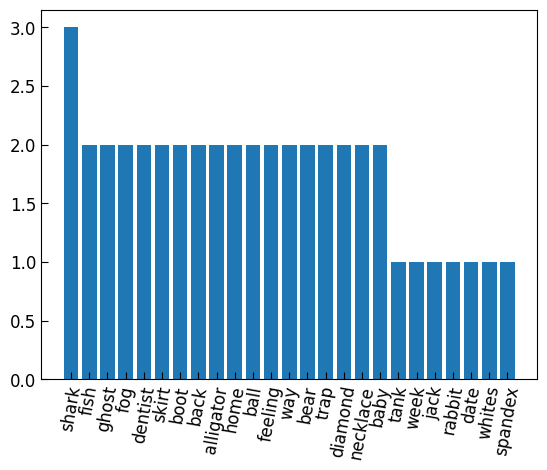

In [55]:
plt.bar(range(len(top25dict)), list(top25dict.values()), tick_label=list(top25dict.keys()))
plt.xticks(rotation=80)
plt.savefig("noun_frequency.png")
plt.show()